# **Intrudução**


Este arquivo "notebook" é uma série de **códigos passo a passo**, a fim de utilizar as ferramentas do **DepthAnything V2** sobre **uma ou mais imagens que o usuário (você) poderá inserir**.

O objetivo é o oferecer de forma **simples e direta**, um resultado de um mapa de profundidade **sem que o usuário (você) precise ter conhecimentos prévios** sobre a utilização da ferramente (DepthAnything V2).

Caso nunca tenha utilizado um "notebook", basta ler os textos apresentados, se necessário executar alguma ação como "inserir imagens" e executar o código descrito.

Para mais informações sobre o modelo e a sua utilização, acesse o [repositório oficial](https://github.com/DepthAnything/Depth-Anything-V2).

# **1. Configurando Ambiente e instalando dependências**

**1.1. Instalar a biblioteca do Depth Anything v2 e suas dependências**

Apenas execute o código.

In [1]:
!git clone https://github.com/DepthAnything/Depth-Anything-V2

fatal: destination path 'Depth-Anything-V2' already exists and is not an empty directory.


In [2]:
pip install -r "Depth-Anything-V2/requirements.txt"

**1.2. Importar Depth Anything V2**

Apenas execute o código.

In [7]:
import os
os.chdir("/content/")
os.chdir("./Depth-Anything-V2")
from depth_anything_v2.dpt import DepthAnythingV2
os.chdir("/content/")

**1.3. Instalar dependências do colab**

Apenas execute o códigos.

In [8]:
pip install matplotlib

In [9]:
pip install opencv-python

**1.4. Importar dependências**

Apenas execute o código.

In [10]:
from matplotlib import pyplot as plt
import cv2

**1.5. Criar pasta do modelo pré-treinado**

Apenas execute o código.

In [15]:
files = [f for f in os.listdir()]
there_is_weightsFolder = False

for file in files:
  if file == "weights":
    there_is_weightsFolder = True

if not there_is_weightsFolder:
  os.mkdir("weights")

**1.4. Baixando o modelo e o configurando**

Faça o download do modelo pré-treinado **"Depth-Anything-V2-Large"** em [Link do repositório oficial](https://github.com/DepthAnything/Depth-Anything-V2).

Após isso, insirá o arquivo (com .pth no final) na pasta "./weights".

Caso tenha baixado e inserido no local de forma correta, o código seguinte deverá ser executado sem erros.

In [16]:
import argparse
import cv2
import glob
import matplotlib
import numpy as np
import torch

DEVICE = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

model_configs = {
    'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
    'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]},
    'vitl': {'encoder': 'vitl', 'features': 256, 'out_channels': [256, 512, 1024, 1024]},
    'vitg': {'encoder': 'vitg', 'features': 384, 'out_channels': [1536, 1536, 1536, 1536]}
}

encoder = 'vitl' # or 'vits', 'vitb', 'vitg'

model = DepthAnythingV2(**model_configs[encoder])
model.load_state_dict(torch.load(f'./weights/depth_anything_v2_{encoder}.pth', map_location='cpu'))
model = model.to(DEVICE).eval()

# **2. Insira imagens**

**2.1. Criar pasta "images" e "results"**

Apenas execute o código.

In [17]:
files = [f for f in os.listdir()]
there_is_imagesFolder = False
there_is_resultsFolder = False

for file in files:
  if file == "results":
    there_is_resultsFolder = True
  if file == "images":
    there_is_imagesFolder = True

if not there_is_resultsFolder:
  os.mkdir("results")
if not there_is_imagesFolder:
  os.mkdir("images")

**2.2 Insira a sua imagem em "./images"**

Abra a aba do arquivos e encontre a pasta "images", entre e insirá a sua(s) imagem(s).

**Cheque se a sua imagem foi inserida no local correto, se foi, aparecerá aqui:**

Na sua pasta existe: ['img01.jpg']


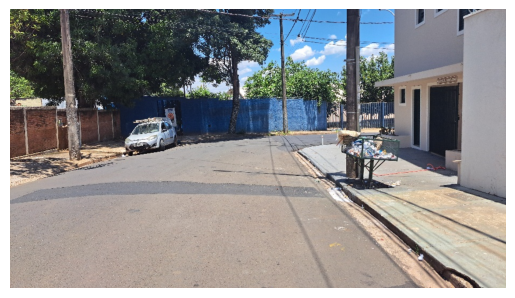

In [18]:
# Captura e lista as imagens em content/images
files = [f for f in os.listdir(path="./images")]

print(f'Na sua pasta existe: {files}')

# Exibe a imagem
for file in files:
  if(file[0] != '.'):
    image = plt.imread(f'./images/{file}')
    plt.imshow(image)
    plt.axis('off')
    plt.show()



# **3. Mapa de profundidade**

Será exibida a imagem do resultado do mapa de profundidade, e a imagem resultante pode ser baixada ou encontrada em formato de arquivo na pasta "results"

Obs. A segmentação total exige um tempo maior para ser processada. Portanto, tenha a espectativa de esperar vários minutos.

Na sua pasta existe: ['img01.jpg']


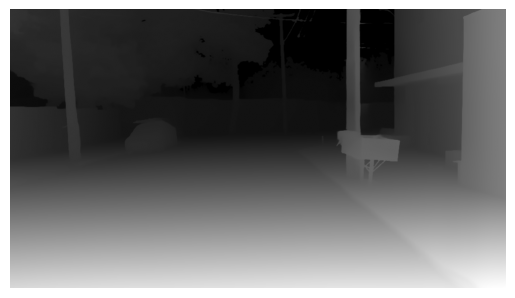

In [23]:
# Captura e lista as imagens em content/images
files = [f for f in os.listdir(path="./images")]

print(f'Na sua pasta existe: {files}')

# Exibe a imagem
for file in files:
  if(file[0] != '.'):
    raw_img = cv2.imread(f'./images/{file}') # HxWx3 raw image in numpy
    depth = model.infer_image(raw_img) # HxW raw depth map in numpy

    depth_min = depth.min()
    depth_max = depth.max()
    depth_normalized = (depth - depth_min) / (depth_max - depth_min + 1e-6)

    plt.imshow(depth_normalized, cmap="gray")
    plt.axis('off')
    plt.show()

    depth_8bit = (depth_normalized * 255).astype('uint8')
    cv2.imwrite(f'./results/depth-{file}', depth_8bit)